In [1]:
import pandas as pd

In [2]:
app_train = pd.read_csv("../CreditRisk/home-credit-default-risk/application_train.csv")
app_test = pd.read_csv("../CreditRisk/home-credit-default-risk/application_test.csv")

In [3]:
description = pd.read_csv("../CreditRisk/home-credit-default-risk/HomeCredit_columns_description.csv")

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Descrição das Colunas**

In [49]:
# for i in range(len(description)):
#     print("----------")
#     print("Table -",description.iloc[i]['Table'])
#     print("Col -",description.iloc[i]['Row'])
#     print("Des - ",description.iloc[i]['Description'])

In [50]:
# for col in app_train:
#     if app_train[col].dtype != 'object':
#         display(pd.DataFrame(app_train[col].describe()))

In [7]:
app_train['DAYS_BIRTH'] =abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

<AxesSubplot:ylabel='Density'>

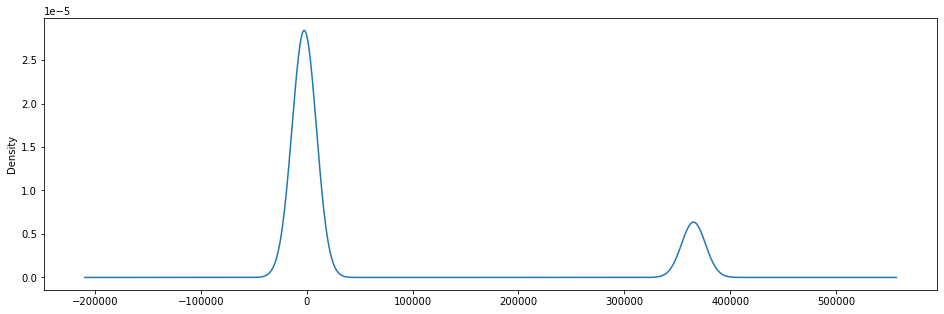

In [8]:
app_train["DAYS_EMPLOYED"].plot.kde(figsize=(16,5))

**Valores nulos**

In [9]:
mis_val_sums = app_train.isnull().sum()
percent_nan = 100 * mis_val_sums / len(app_train)
table_na = pd.concat([mis_val_sums,percent_nan],axis=1)
table_na.columns = ["Nan",'%']
table_na.sort_values("%",ascending=False)[:50]
 

,Nan,%
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


**Label Enconder**

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

def label_encoder_df(df,enconder):    
    for col in df:
        if df[col].dtype == 'object' and len(df[col].unique()) <= 2:
            enconder.fit(df[col])
            df[col] = enconder.transform(df[col])
    return df

app_train = label_encoder_df(app_train,label_encoder)
app_test  = label_encoder_df(app_test,label_encoder)

**Dummies**

In [11]:
app_train.shape

(307511, 122)

In [12]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

In [13]:
#Alinhando Colunas
Y = app_train['TARGET']
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
app_train['TARGET'] = Y

In [14]:
app_train.shape

(307511, 238)

**Correlações**

In [15]:
correlations = app_train.corr()['TARGET'].sort_values()

In [16]:
print("Positivas")
correlations[:20]

Positivas


EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
DAYS_BIRTH                             -0.078239
NAME_EDUCATION_TYPE_Higher education   -0.056593
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED                          -0.044932
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
EMERGENCYSTATE_MODE_No                 -0.042201
HOUSETYPE_MODE_block of flats          -0.040594
AMT_GOODS_PRICE                        -0.039645
REGION_POPULATION_RELATIVE             -0.037227
ELEVATORS_AVG                          -0.034199
ELEVATORS_MEDI                         -0.033863
FLOORSMIN_AVG                          -0.033614
FLOORSMIN_MEDI                         -0.033394
WALLSMATERIAL_MODE_Panel               -0.033119
Name: TARGET, dtype:

In [17]:
print("Negativas")
correlations.tail(15)

Negativas


LIVE_CITY_NOT_WORK_CITY                              0.032518
OWN_CAR_AGE                                          0.037612
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
TARGET                                               1.000000
Name: TARGET, dtype: float64

In [18]:
# Display correlations
# .00-.19 “very weak”
# .20-.39 “weak”
# .40-.59 “moderate”
# .60-.79 “strong”
# .80-1.0 “very strong”

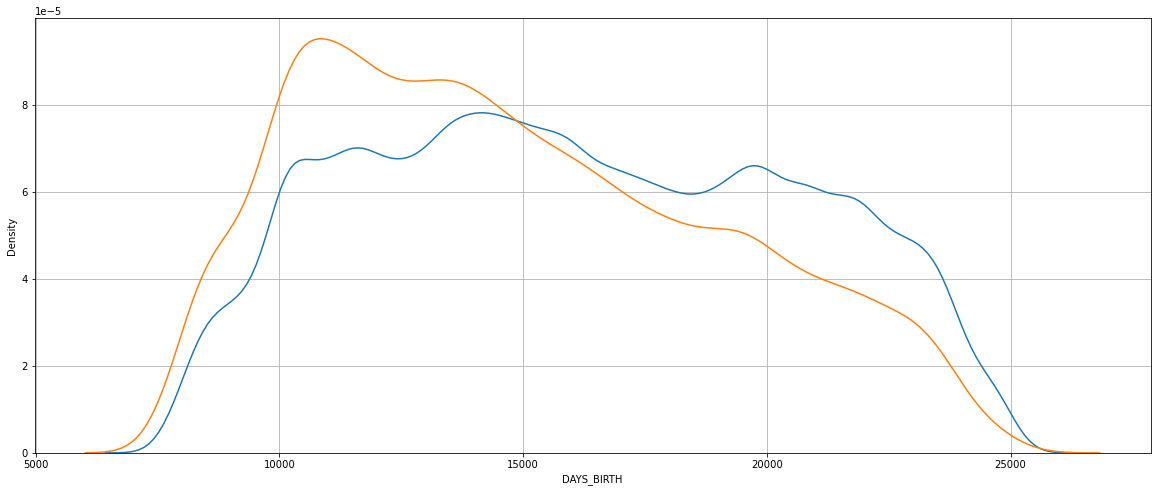

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 8))
plt.grid(linestyle='-')

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'], label = 'target == 1')
plt.show()

In [20]:
# Age information into a separate dataframe
import numpy as np
age_data = app_train.loc[:,('TARGET', 'DAYS_BIRTH')]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


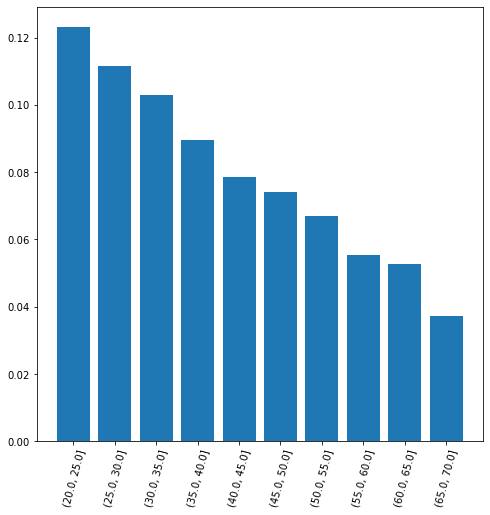

In [21]:
plt.figure(figsize = (8, 8))
plt.bar(age_groups.index.astype(str), age_groups['TARGET'])
plt.xticks(rotation = 75);

In [22]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()

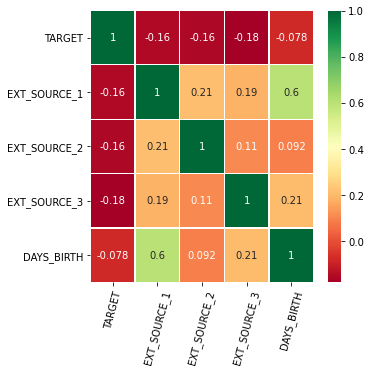

In [23]:
sns.heatmap(ext_data_corrs,annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->matriz de correlação
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.xticks(rotation = 75); 
plt.show()

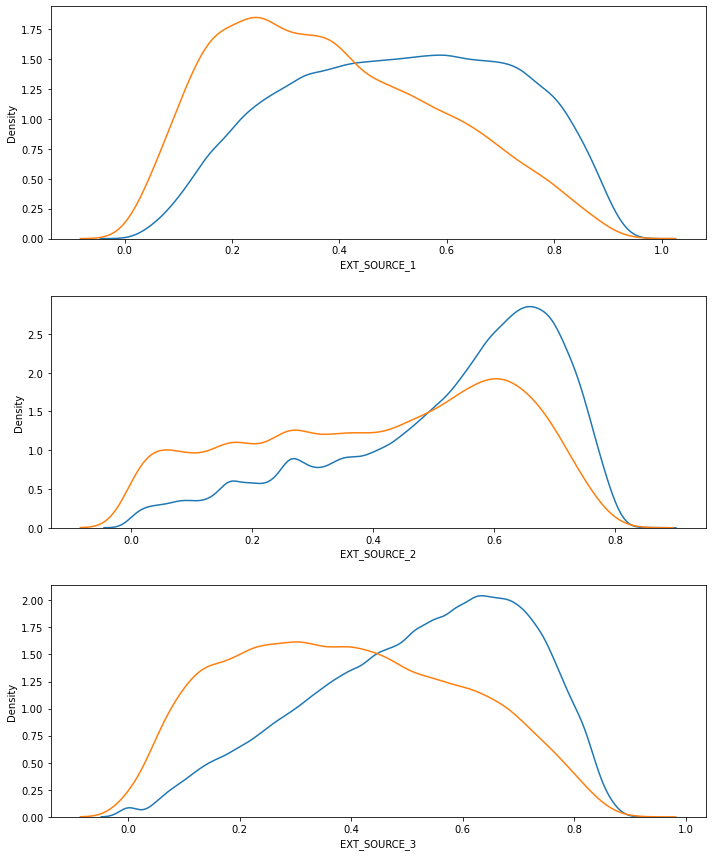

In [24]:
plt.figure(figsize = (10, 12)) 
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):    
    plt.subplot(3, 1, i + 1)    
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')    
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')    
    plt.xlabel('%s' % source); plt.ylabel('Density');    
plt.tight_layout(h_pad = 2.5)

In [25]:
age_data.head()

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


**CORRELAÇÂO DE EDUCACAO**

In [26]:
educatins_cols = ["TARGET"]
educatins_cols = educatins_cols + [col for col in app_train.columns if 'NAME_EDUCATION_TYPE' in col]
education_data = app_train[educatins_cols]
education_data = education_data.corr()

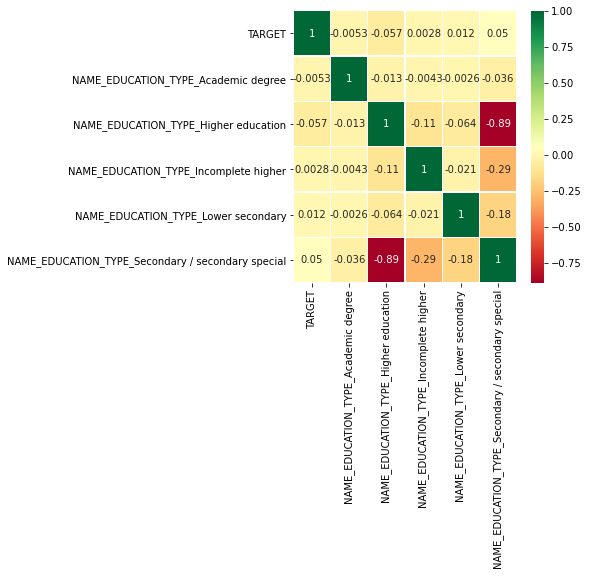

In [27]:
sns.heatmap(education_data,annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->matriz de correlação
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.xticks(rotation = 90); 
plt.show()

In [28]:
region_cols = ["TARGET"]
region_cols = region_cols + [col for col in app_train.columns if 'REGION_RATING' in col]
region_data = app_train[region_cols]
region_data = region_data.corr()

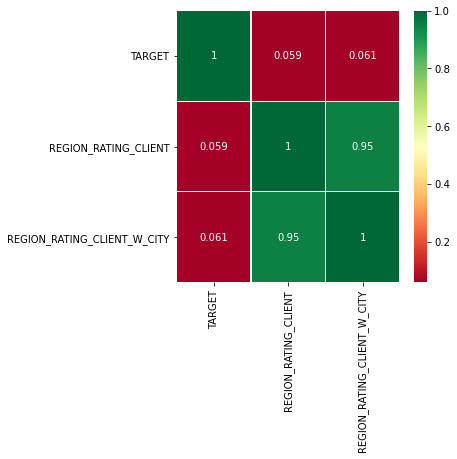

In [29]:
sns.heatmap(region_data,annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->matriz de correlação
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.xticks(rotation = 90); 
plt.show()

In [30]:
region_cols

['TARGET', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']

**Polynomial Features**


In [31]:
poly_column_list = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']
poly_features = app_train[poly_column_list]
poly_features["TARGET"] = app_train["TARGET"]
poly_features_test = app_test[poly_column_list]

<ipython-input-31-27bfccd15fc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_features["TARGET"] = app_train["TARGET"]


**Imputter**

In [32]:
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(strategy = 'median')
Y_poly = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])
poly_features = simple_imputer.fit_transform(poly_features)
poly_features_test = simple_imputer.transform(poly_features_test)

In [33]:
from sklearn.preprocessing import PolynomialFeatures                                 
poly_transformer = PolynomialFeatures(degree = 3)
poly_transformer.fit(poly_features)
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
poly_features = pd.DataFrame(poly_features,columns = poly_transformer.get_feature_names(poly_column_list))

In [34]:
# Add in the target
poly_features['TARGET'] = Y_poly

In [35]:
poly_features.shape

(307511, 36)

In [36]:
# Find the correlations with the target
poly_corrs = poly_features.corr()

In [37]:
poly_corrs.loc[poly_corrs["TARGET"]>0,"TARGET"].sort_values()

TARGET    1.0
Name: TARGET, dtype: float64

In [38]:
poly_corrs.loc[poly_corrs["TARGET"]<0,"TARGET"].sort_values()[:10]

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64

In [39]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(poly_column_list))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)


Training data with polynomial features shape:  (307511, 272)
Testing data with polynomial features shape:   (48744, 272)


**Imputando Dados e Escalando**

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
simple_imputer = SimpleImputer(strategy = 'median')

poly_features = simple_imputer.fit_transform(app_train_poly)
poly_features_test = simple_imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)



In [41]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

**LightGBM**

In [42]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc


In [43]:
def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
 
    # Iterate through the columns
    for col in features:
        if features[col].dtype == 'object':
            # If 2 or fewer unique categories
            if len(list(features[col].unique())) <= 2:
                # Train on the training data
                le.fit(features[col])
                # Transform both training and testing data
                features[col] = le.transform(features[col])
                test_features[col] = le.transform(test_features[col])
    
    
    # DUMMIES
    features = pd.get_dummies(features)
    test_features = pd.get_dummies(test_features)

    # Align the dataframes by the columns
    features, test_features = features.align(test_features, join = 'inner', axis = 1)

    # No categorical indices to record
    cat_indices = 'auto'   
     
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [44]:
poly_features_df = pd.DataFrame(poly_features,columns=poly_features_names)
poly_features_df["TARGET"]=Y_poly
poly_features_teste_df = pd.DataFrame(poly_features_test,columns=poly_features_names)

In [45]:
submission, fi, metrics = model(poly_features_df, poly_features_teste_df)

Training Data Shape:  (307511, 271)
Testing Data Shape:  (48744, 271)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.797343	train's binary_logloss: 0.548062	valid's auc: 0.753487	valid's binary_logloss: 0.565321
[400]	train's auc: 0.828492	train's binary_logloss: 0.517189	valid's auc: 0.75388	valid's binary_logloss: 0.546605
Early stopping, best iteration is:
[496]	train's auc: 0.841469	train's binary_logloss: 0.504048	valid's auc: 0.754109	valid's binary_logloss: 0.538324
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.797381	train's binary_logloss: 0.548253	valid's auc: 0.754556	valid's binary_logloss: 0.56503
[400]	train's auc: 0.828758	train's binary_logloss: 0.517094	valid's auc: 0.754886	valid's binary_logloss: 0.546417
Early stopping, best iteration is:
[316]	train's auc: 0.816851	train's binary_logloss: 0.529142	valid's auc: 0.755345	valid's binary_logloss: 0.553557
Training until validation scores don't imp

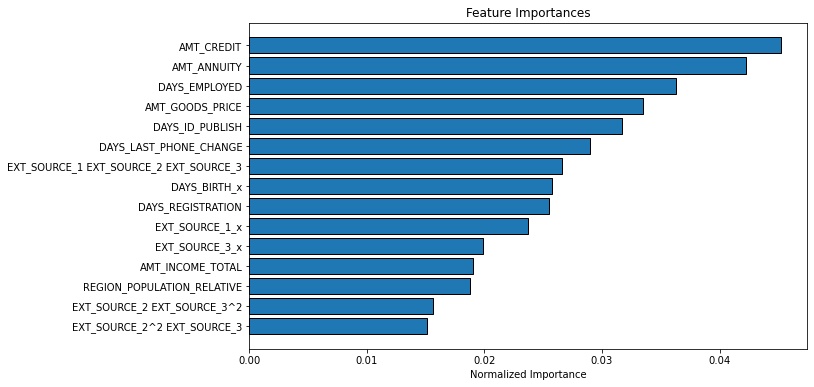

,index,feature,importance,importance_normalized
0,5,AMT_CREDIT,447.2,0.045199
1,6,AMT_ANNUITY,418.4,0.042288
2,10,DAYS_EMPLOYED,359.4,0.036325
3,7,AMT_GOODS_PRICE,331.6,0.033515
4,12,DAYS_ID_PUBLISH,313.6,0.031696
...,...,...,...,...
266,239,EXT_SOURCE_3_y,0.0,0.000000
267,240,DAYS_BIRTH_y,0.0,0.000000
268,241,EXT_SOURCE_1^2,0.0,0.000000
269,118,NAME_INCOME_TYPE_Student,0.0,0.000000


In [46]:
plot_feature_importances(fi)

In [47]:
submission.drop("SK_ID_CURR",axis=1)
submission['SK_ID_CURR'] = app_test['SK_ID_CURR']
submission.to_csv('polynomial_lbgm.csv', index = False)

In [48]:
submission['SK_ID_CURR']

0        100001
1        100005
2        100013
3        100028
4        100038
          ...  
48739    456221
48740    456222
48741    456223
48742    456224
48743    456250
Name: SK_ID_CURR, Length: 48744, dtype: int64